In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new 
base = automap_base()

# reflect the tables
base.prepare(engine, reflect = True)

In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
me = base.classes.measurement
st = base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
# Using the query code from class and then assign to variable
date = session.query(func.max(me.date)).first()
date

('2017-08-23')

2016-08-23


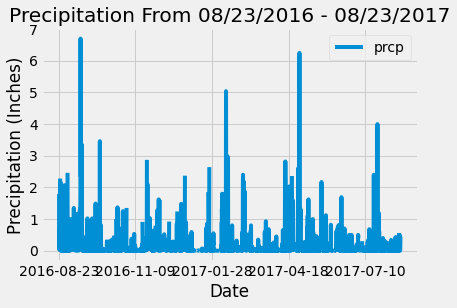

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
start_year = date

# Calculate the date one year from the last date in data set. 
last_year = dt.date(2016,8,23)
print(last_year)

# Perform a query to retrieve the data and precipitation scores
precip_query = session.query(me.date, me.prcp).filter(me.date >= last_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(precip_query)
precip_df = precip_df.set_index("date")

# Sort the dataframe by date
precip_df = precip_df.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot()
plt.xlabel("Date")
plt.ylabel("Precipitation (Inches)")
plt.title("Precipitation From 08/23/2016 - 08/23/2017")
plt.show()


In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number stations in the dataset
stations = session.query(func.count(st.station)).all()
stations

[(9)]

In [19]:
sts = session.query(st.station).all()

#Create a station list
st_list = []

#Loop through the query and store the stations in the list
for x in sts:
    st_list.append(x[0])

st_list

['USC00519397',
 'USC00513117',
 'USC00514830',
 'USC00517948',
 'USC00518838',
 'USC00519523',
 'USC00519281',
 'USC00511918',
 'USC00516128']

In [55]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
station_list = session.query(me.station, func.count(me.station)).group_by(me.station).order_by(func.count(me.station).desc()).all()
station_list

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [56]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
low_temp = session.query(func.min(me.tobs)).filter(me.station == 'USC00519281').all()
max_temp = session.query(func.max(me.tobs)).filter(me.station == 'USC00519281').all()
avg_temp = session.query(func.avg(me.tobs)).filter(me.station == 'USC00519281').all()

print(f"USC00519281 Low Temperature: {low_temp[0][0]}")
print(f"USC00519281 High Temperature: {max_temp[0][0]}")
print(f"USC00519281 Average Temperature: {avg_temp[0][0]}")

USC00519281 Low Temperature: 54.0
USC00519281 High Temperature: 85.0
USC00519281 Average Temperature: 71.66378066378067


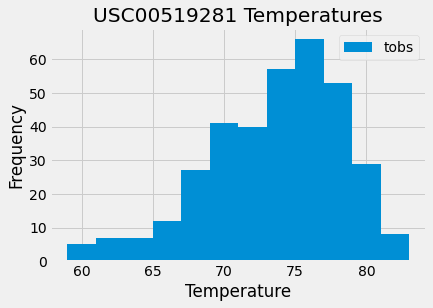

In [60]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

#First query filtering by the station ID
temps_query = session.query(me.tobs).filter(me.station == 'USC00519281').filter(me.date >= last_year).all()

#Create a db of the resultss
temps_db = pd.DataFrame(temps_query)

#Plot a histogram using the DF
temps_db.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.title('USC00519281 Temperatures')
plt.show()

# Close session

In [ ]:
# Close Session
session.close()